In [12]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import keras
from keras.utils.vis_utils import plot_model

In [2]:
! git clone https://github.com/Vishisht-rao/POS-Tagger-Using-Transformers.git

fatal: destination path 'POS-Tagger-Using-Transformers' already exists and is not an empty directory.


In [3]:
max_seq_length = 72
n_tags = 13 # len(tag2index)
EPOCHS = 10

In [4]:
train_input_ids = np.load('POS-Tagger-Using-Transformers/preprocessing_outputs_final/train_input_ids.npz')
train_input_masks = np.load('POS-Tagger-Using-Transformers/preprocessing_outputs_final/train_input_masks.npz')
train_type_ids = np.load('POS-Tagger-Using-Transformers/preprocessing_outputs_final/train_type_ids.npz')
train_tags = np.load('POS-Tagger-Using-Transformers/preprocessing_outputs_final/train_tags.npz')

In [5]:
train_input_ids = train_input_ids['arr_0']
train_input_masks = train_input_masks['arr_0']
train_type_ids = train_type_ids['arr_0']
train_tags = train_tags['arr_0']

In [6]:
test_input_ids = np.load('POS-Tagger-Using-Transformers/preprocessing_outputs_final/test_input_ids.npz')
test_input_masks = np.load('POS-Tagger-Using-Transformers/preprocessing_outputs_final/test_input_masks.npz')
test_type_ids = np.load('POS-Tagger-Using-Transformers/preprocessing_outputs_final/test_type_ids.npz')
test_tags = np.load('POS-Tagger-Using-Transformers/preprocessing_outputs_final/test_tags.npz')

In [7]:
test_input_ids = test_input_ids['arr_0']
test_input_masks = test_input_masks['arr_0']
test_type_ids = test_type_ids['arr_0']
test_tags = test_tags['arr_0']

In [8]:
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="segment_ids")

In [9]:
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=True)

In [10]:
bert_inputs = [input_word_ids, input_mask, segment_ids]
bert_output = bert_layer(bert_inputs)[1]
outputs = keras.layers.Dense(n_tags, activation=keras.activations.softmax)(bert_output)
model = keras.models.Model(inputs=bert_inputs, outputs=outputs)

In [11]:
model.summary(200)

Model: "model"
________________________________________________________________________________________________________________________________________________________________________________________________________
Layer (type)                                                      Output Shape                                Param #                 Connected to                                                      
input_word_ids (InputLayer)                                       [(None, 72)]                                0                                                                                         
________________________________________________________________________________________________________________________________________________________________________________________________________
input_mask (InputLayer)                                           [(None, 72)]                                0                                                                      

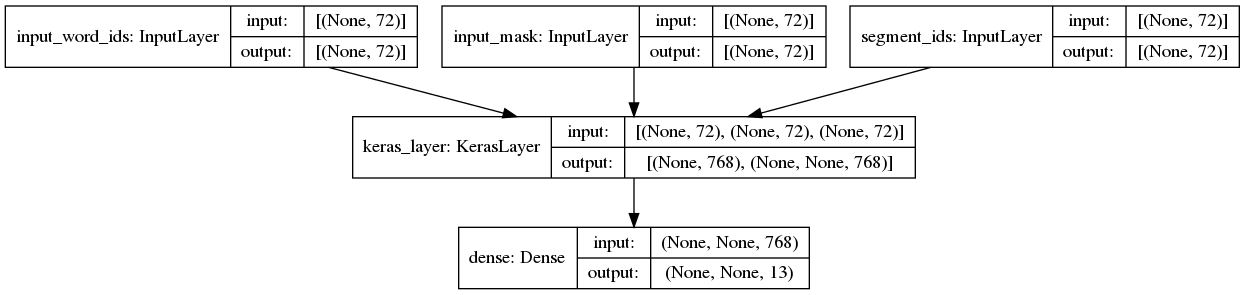

In [13]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00004), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
filepath = 'my_best_model.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=False,
                             save_weights_only=True,
                             mode='min')
callbacks = [checkpoint]

In [ ]:
model.fit([train_input_ids, train_input_masks, train_type_ids], 
                    train_tags,
                    validation_data=([test_input_ids, test_input_masks, test_type_ids], test_tags),
                    epochs=EPOCHS,
                    batch_size=16,
                    shuffle=True,
                    verbose=1,
                    callbacks=callbacks
                   )

Epoch 1/10
3626/3626 [==============================] - ETA: 0s - loss: 0.1610 - accuracy: 0.9428
Epoch 00001: val_accuracy improved from inf to 0.96868, saving model to my_best_model.hdf5
3626/3626 [==============================] - 1794s 489ms/step - loss: 0.1610 - accuracy: 0.9428 - val_loss: 0.0920 - val_accuracy: 0.9687
Epoch 2/10
3626/3626 [==============================] - ETA: 0s - loss: 0.0642 - accuracy: 0.9772
Epoch 00002: val_accuracy did not improve from 0.96868
3626/3626 [==============================] - 1765s 487ms/step - loss: 0.0642 - accuracy: 0.9772 - val_loss: 0.0599 - val_accuracy: 0.9790
Epoch 3/10
3626/3626 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9842
Epoch 00003: val_accuracy did not improve from 0.96868
3626/3626 [==============================] - 1764s 486ms/step - loss: 0.0445 - accuracy: 0.9842 - val_loss: 0.0504 - val_accuracy: 0.9838
Epoch 4/10
3626/3626 [==============================] - ETA: 0s - loss: 0.0342 - accuracy: 